In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [32]:
test=pd.read_csv('test.csv')
test.drop(['Id','Utilities'], axis=1, inplace=True)
pd.pandas.set_option('max_columns',None)
test.shape

(1459, 78)

In [33]:
pd.pandas.set_option('max_rows',None)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [34]:
missing_test = test.isnull().sum()
missing_test[missing_test > 0].sort_values()

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtExposure      44
BsmtQual          44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64

In [35]:
col1 = ['PoolQC','MiscFeature','FireplaceQu','Alley','Fence','MasVnrType' , 'GarageQual' , 
        'GarageCond' ,'GarageFinish' , 'GarageType' , 'BsmtExposure' ,'GarageYrBlt', 
        'BsmtCond' , 'BsmtQual' , 'BsmtFinType2' , 'BsmtFinType1']
for col in col1:
    test[col].fillna('None' , inplace = True)

In [36]:
col2=['MasVnrArea' , 'GarageCars' , 'GarageArea' , 'BsmtUnfSF' , 'BsmtFinSF2' , 'BsmtFinSF1' , 'TotalBsmtSF']
for col in col2:
    test[col].fillna(0, inplace = True)

In [37]:
col3 = ['MSZoning','BsmtFullBath','BsmtHalfBath','Functional','KitchenQual','SaleType' , 
         'Exterior1st','Exterior2nd']
for col in col3:
    test[col].fillna(test[col].mode()[0], inplace=True)

In [38]:
test["Neighborhood"] = pd.qcut(test.LotArea,10)
test.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median'])

LotFrontage       
                          mean median
Neighborhood                         
(1469.999, 4793.0]   34.259843   32.0
(4793.0, 6958.4]     55.398551   52.0
(6958.4, 7843.8]     61.534351   61.0
(7843.8, 8640.0]     67.368000   65.0
(8640.0, 9399.0]     69.694915   70.0
(9399.0, 10125.8]    73.289062   75.0
(10125.8, 10940.2]   73.395349   76.0
(10940.2, 12194.4]   81.508929   80.5
(12194.4, 14259.0]   85.067227   85.0
(14259.0, 56600.0]   92.266667   90.0

In [40]:
test['LotFrontage'] = test.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [43]:
test.shape

(1459, 78)

In [44]:
test['GarageAreaperCar']=test['GarageArea']/test['GarageCars']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['AreaperRoom']=test['GrLivArea']/test['TotRmsAbvGrd']
#test.drop(['GarageArea','GarageCars','GrLivArea', 'TotRmsAbvGrd'], axis=1, inplace=True)

In [45]:
#test['GarageAreaperCar'].fillna(0,inplace=True)


In [46]:
test.shape

(1459, 81)

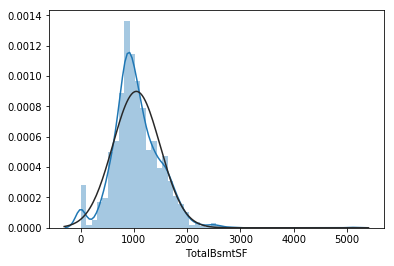

In [47]:
sns.distplot(test['TotalBsmtSF'], fit=norm)

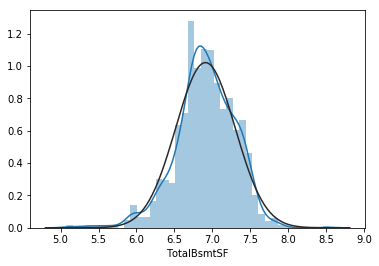

In [48]:
test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt'] = 0 
test.loc[test['TotalBsmtSF']>0,'HasBsmt'] = 1

test.loc[test['HasBsmt']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])

sns.distplot(test[test['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)

In [49]:
test.shape

(1459, 82)

In [50]:
num_cols = test._get_numeric_data().columns
len(num_cols)
#num_cols


39

In [51]:
cat_cols = test.select_dtypes(include='object').columns
len(cat_cols)
#cat_cols

42

In [52]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageAreaperCar,TotalSF,AreaperRoom,HasBsmt
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,"(10940.2, 12194.4]",Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,6.782192,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,730.0,1778.0,179.200000,1
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,"(14259.0, 56600.0]",Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,7.192182,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,312.0,2658.0,221.500000,1
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,"(12194.4, 14259.0]",Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,6.833032,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,241.0,2557.0,271.500000,1
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,"(9399.0, 10125.8]",Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,6.830874,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,235.0,2530.0,229.142857,1
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,"(4793.0, 6958.4]",Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,7.154615,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,253.0,2560.0,256.000000,1


In [53]:
encoded_categorical_df = pd.get_dummies(test, columns = cat_cols, drop_first = True)


In [54]:
num_drop = list(num_cols)
encoded_categorical_df.drop(columns=num_drop,inplace=True)


In [55]:
col_drop = list(cat_cols)
test.drop(columns=col_drop,inplace=True)

In [56]:
df=pd.concat([test, encoded_categorical_df], axis=1)


In [57]:
df.shape

(1459, 319)

In [58]:
from sklearn.preprocessing import RobustScaler

In [59]:
from sklearn.preprocessing import normalize,MinMaxScaler

In [61]:
#min_max_scaler = MinMaxScaler()
robust = RobustScaler()
col_to_normalize = ['MSSubClass', 'LotArea', 'MasVnrArea','GrLivArea', 'BsmtFinSF1','LotFrontage','GarageArea',
                    'GarageCars','TotRmsAbvGrd','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                    'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                   'AreaperRoom','GarageAreaperCar','TotalSF']
df[col_to_normalize] = robust.fit_transform(df[col_to_normalize])


In [62]:
df.shape

(1459, 319)

In [63]:
test_data=df.to_csv('test_data.csv')